#Loan Predicator



Notebook made by: __Hayder CHAKROUN__

E-mail: __hayderchakroun5@gmail.com__



<h1>Scope</h1>
In this project, we're going to predict wether a certain data object = a person applying for a loan, will be approved or not. We will be using the kaggle dataset of Predication [here](https://www.kaggle.com/datasets/ninzaami/loan-predication), and we will be using SVM for this job.

#Preprocessing

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Machine Learning projects/5 - Loan Status Prediction - SVM/loan predication.csv')

let us take a look at the data !

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From a technical standpoint, we can see that we have both categorical and numerical features. WE also notice missing values, that we will need to handle.

From an analytical standpoint, we notice some ordinal text features, but no nominal feature. So encoding will be ordinal encoding.

Let us try to take a look at our data more.

<ipython-input-8-c6e2ae99cd0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-8-c6e2ae99cd0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-8-c6e2ae99cd0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-8-c6e2ae99cd0c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

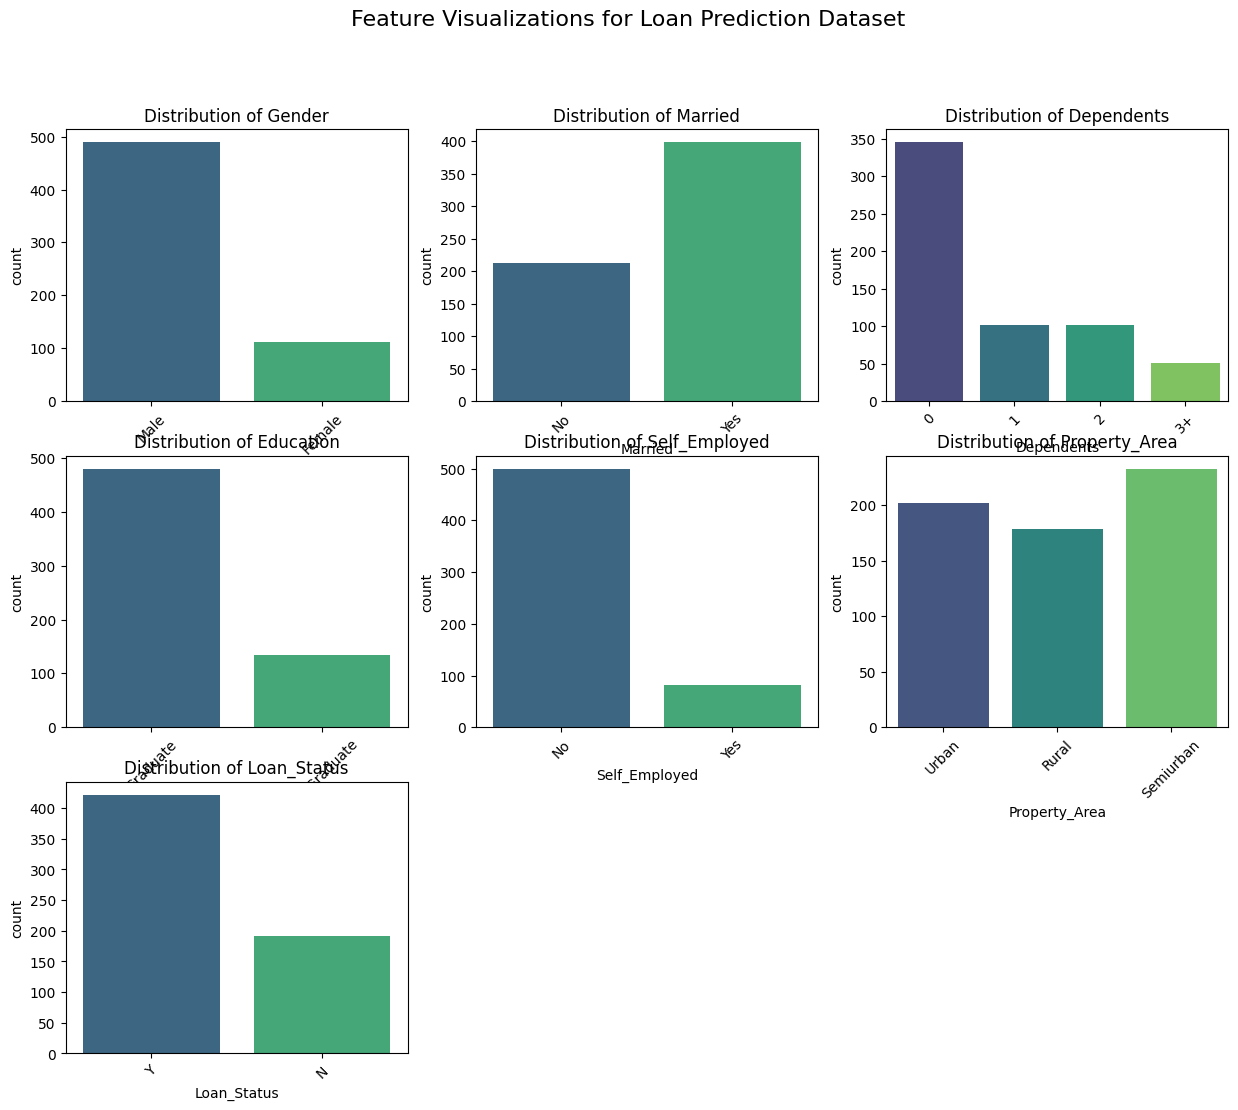

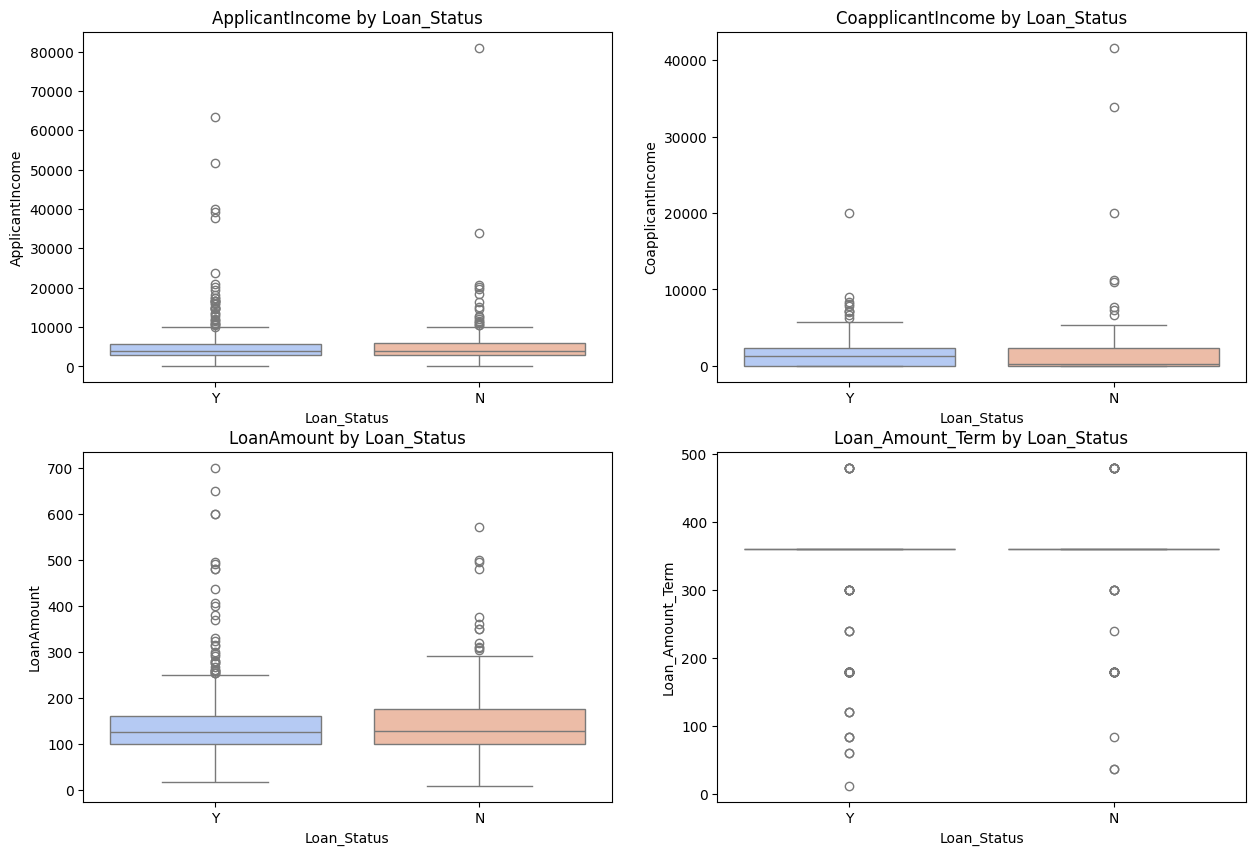

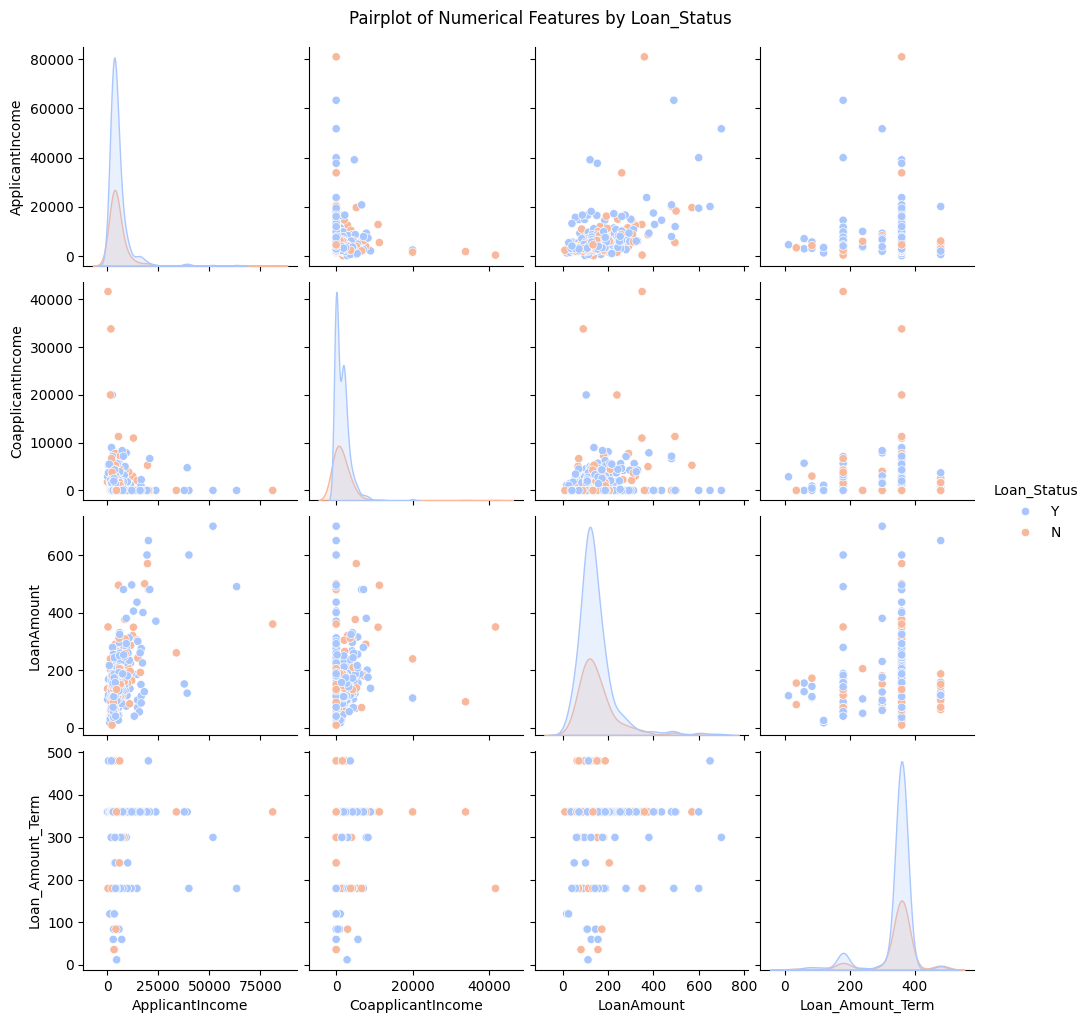

KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Visualizations for Loan Prediction Dataset", fontsize=16)

# Count plots for categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

# Box plots for numerical features by categorical feature Loan_Status
plt.figure(figsize=(15, 10))
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Loan_Status', y=feature, data=data, palette='coolwarm')
    plt.title(f'{feature} by Loan_Status')

# Pairplot to observe numerical features with hue as Loan_Status
sns.pairplot(data, hue='Loan_Status', vars=numerical_features, palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features by Loan_Status', y=1.02)

# Heatmap for correlation of all features (converting categorical to numeric)
plt.figure(figsize=(12, 8))
data_encoded = pd.get_dummies(data, drop_first=True)  # Encoding categorical variables
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Encoded Features')

plt.tight_layout()
plt.show()


as there very few missing values, we will just drop them.

In [3]:
data= data.dropna()

We will also encode

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
# Separate features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])


# Pipeline with preprocessor and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(kernel='linear'))
])
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



<ipython-input-4-f24dc458b263>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [11]:
y_pred = pipeline.predict(X_train)

# Evaluate the model (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 75.69%


Extreme overfitting here.